# Course-End Project: Healthcare

# Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 
# Dataset description:
Variable	Description
 
Age	Age in years 

Sex	1 = male; 0 = female

cp|	Chest pain type

trestbps	Resting blood pressure (in mm Hg on admission to the hospital)

chol	Serum cholesterol in mg/dl

fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg	Resting electrocardiographic results

thalach	Maximum heart rate achieved

exang	Exercise induced angina (1 = yes; 0 = no)

oldpeak	ST depression induced by exercise relative to rest

slope	Slope of the peak exercise ST segment

ca	Number of major vessels (0-3) colored by fluoroscopy

thal	3 = normal; 6 = fixed defect; 7 = reversible defect

Target	1 or 0

In [3]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the dataset

dataset=pd.read_csv("health_dataset.csv")

# 1.	Preliminary analysis:

### a).	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here all the columns are numerical so no need of conversion, trestbps,chol,thalach,oldpeak,age having contineous values other colums have categorical values like 0,1,2,3,4

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
#Shape of dataset
dataset.shape

(303, 14)

In [8]:
#how many class of one feature or target. 
#in this dataset we have to check how many person have Cardiovascular diseases or not.
#0---- no Cardiovascular diseases
#1---- have chances of Cardiovascular diseases
#so this is clear that this is a classification problem 

dataset["target"].value_counts()   #balanced data, it will count total no of entry in each categories 

1    165
0    138
Name: target, dtype: int64

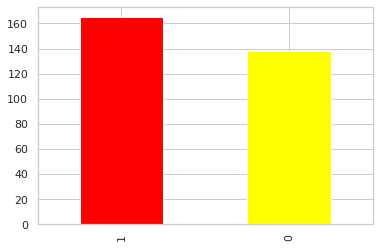

In [28]:
# lets show the distribution of data using bar plot

dataset["target"].value_counts().plot(kind='bar', color=["red","yellow"])
plt.show()

Plot shows person having Cardiovascular diseases(1) =165 and person does not have Cardiovascular diseases(0)=138

data is quite balanced so we go for futher findings like null values ,missing values or any conversions needed.

In [29]:
#info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
#checking for missing values
 
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

### a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data


In [31]:
# lets check for statistical report of all numeical calumns as now we have only numeric columns
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

<AxesSubplot:>

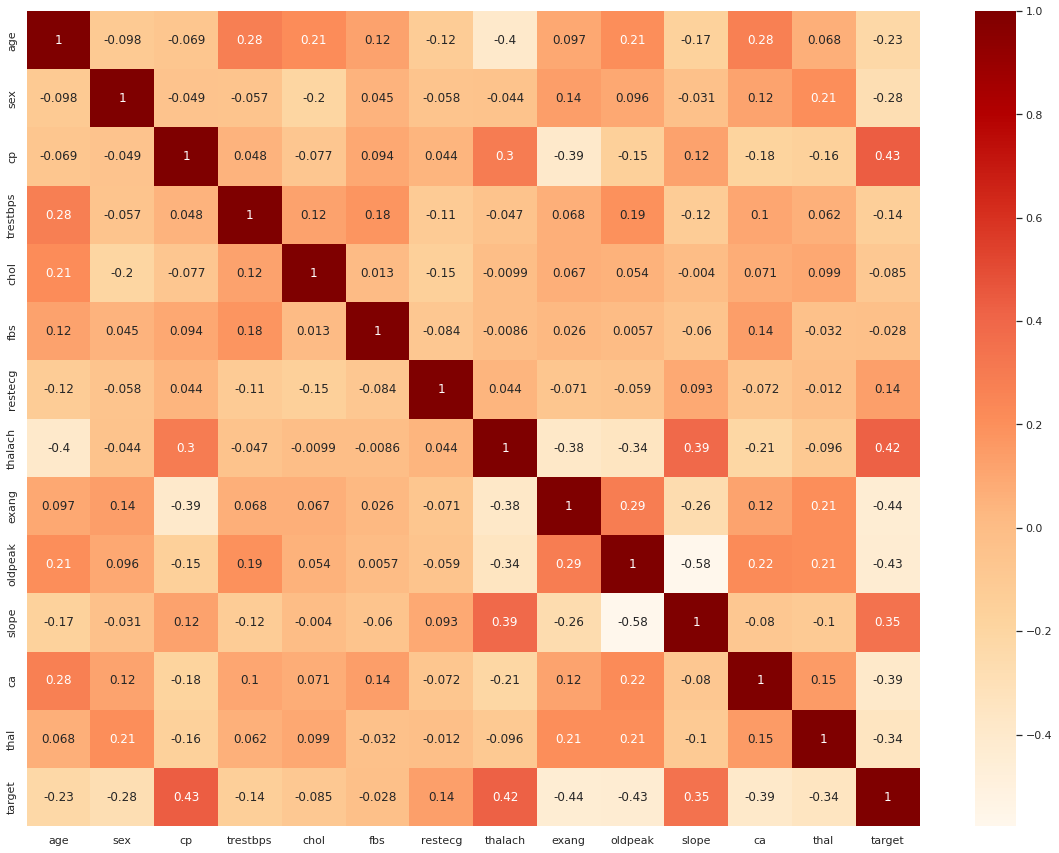

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True,cmap="OrRd")

<AxesSubplot:xlabel='cp', ylabel='count'>

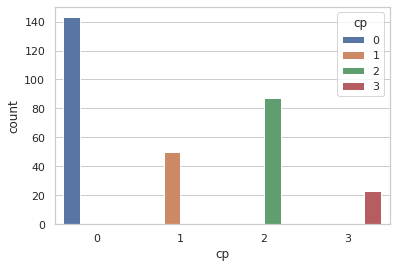

In [33]:
import seaborn as sns
sns.set_theme(style="whitegrid")
#sns.countplot(x=dataset["cp"])
sns.countplot(data=dataset, x="cp", hue="cp")

<AxesSubplot:xlabel='sex', ylabel='count'>

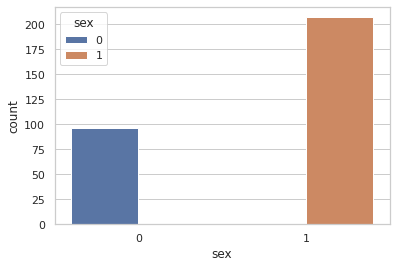

In [42]:
sns.countplot(data=dataset, x="sex", hue="sex")

<AxesSubplot:xlabel='fbs', ylabel='count'>

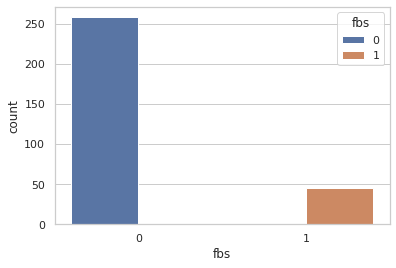

In [43]:
sns.countplot(data=dataset, x="fbs", hue="fbs")

<AxesSubplot:xlabel='restecg', ylabel='count'>

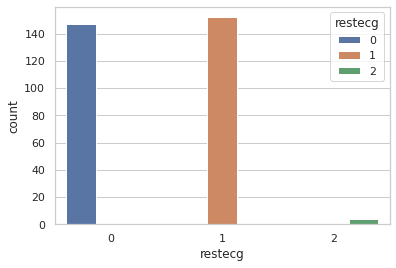

In [44]:
sns.countplot(data=dataset, x="restecg", hue="restecg")

<AxesSubplot:xlabel='exang', ylabel='count'>

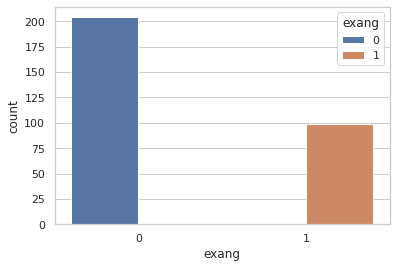

In [45]:
sns.countplot(data=dataset, x="exang", hue="exang")

<AxesSubplot:xlabel='slope', ylabel='count'>

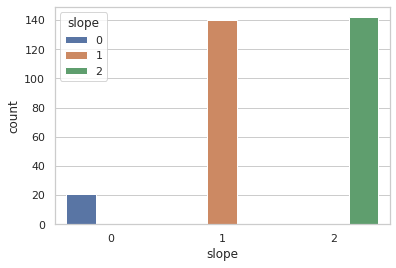

In [46]:
sns.countplot(data=dataset, x="slope", hue="slope")

<AxesSubplot:xlabel='thal', ylabel='count'>

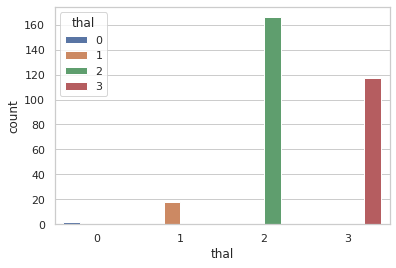

In [47]:
sns.countplot(data=dataset, x="thal", hue="thal")

<AxesSubplot:xlabel='ca', ylabel='count'>

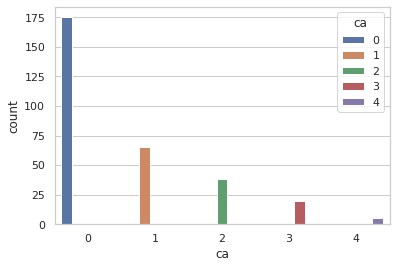

In [48]:
sns.countplot(data=dataset, x="ca", hue="ca")

### c.	Study the occurrence of CVD across the Age category

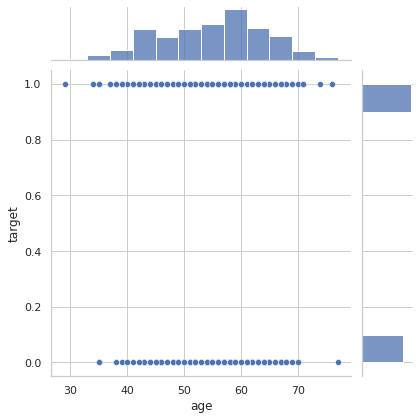

In [49]:
sns.jointplot(data=dataset, x="age", y="target")

### d.	Study the composition of all patients with respect to the Sex category

In [50]:
#Heart Disease Frequency according to Sex, here 1=male ,0=female
dataset.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [53]:
#Creating contingency table to compare sex with target
pd.crosstab(dataset.target, dataset.sex)

sex,0,1
target,,
0,24,114
1,72,93


Here contingency table shows 72 /207 male have chance to Cardiovascular diseases.93/96 female have chance to Cardiovascular diseases. 24 female and 114 male are save from diseases

### e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

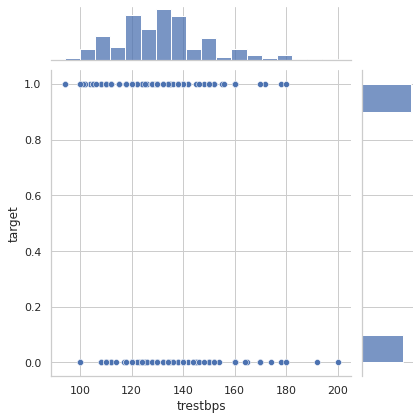

In [65]:
#sns.boxplot(x=dataset["trestbps"])
#pd.crosstab(dataset.target, dataset.trestbps)
sns.jointplot(data=dataset, x="trestbps", y="target")

if a person having resting blood pressure between 120-150mm hg having more risk of heart attack

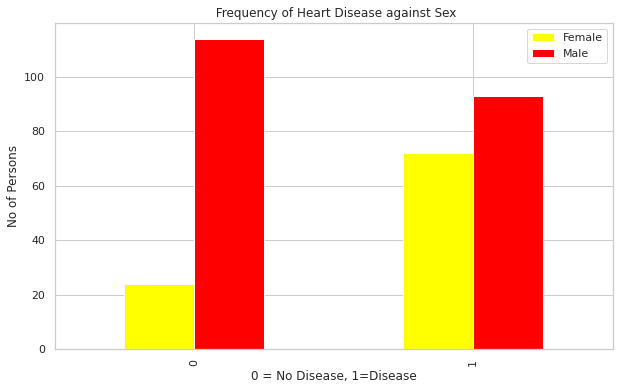

In [66]:
#Create plot of heart disease against sex
pd.crosstab(dataset.target, dataset.sex).plot(kind="bar",figsize=(10,6),color=["yellow","red"])
plt.title(" Frequency of Heart Disease against Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("No of Persons")
plt.legend(["Female","Male"]);

In [67]:
#Heart Disease Frequency vs Chest Pain
#chest pain type
#0: Typical angina: chest pain related decrease blood supply to the heart
#1: Atypical angina: chest pain not related to heart
#2: Non-anginal pain: typically esophageal spasms (non heart related)
#3: Asymptomatic: chest pain not showing signs of disease

In [68]:
#creating crosstab
pd.crosstab(dataset.cp,dataset.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


# Bivariate analysis of important features
like cp-chest pain ,trestbps,fbs,restecg,thalach,exang,slope

In [69]:
#Analysing the 'Chest Pain Type' feature
dataset["cp"].unique()

array([3, 2, 1, 0])

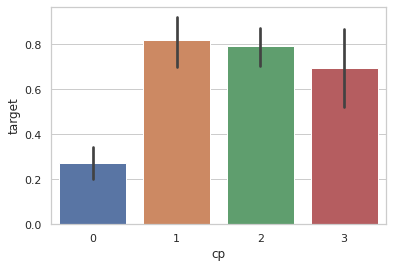

In [70]:
sns.barplot(dataset["cp"],dataset['target'])
plt.show()

graph shows 1: Atypical angina: chest pain not related to heart have the more no of cases than 2: Non-anginal pain: typically esophageal spasms (non heart related) followed by 3: Asymptomatic: chest pain not showing signs of disease 0: Typical angina: chest pain related decrease blood supply to the heart 
#so the person with typical anging problem have less chance of Heard disease

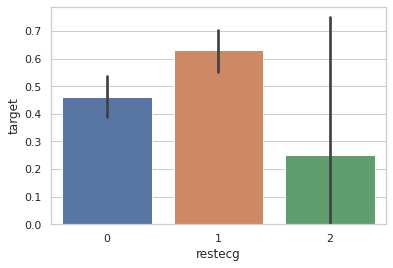

In [71]:
#Analysing the restecg feature (Resting electrocardiographic results )
dataset["restecg"].unique()

sns.barplot(dataset["restecg"],dataset["target"])
plt.show()

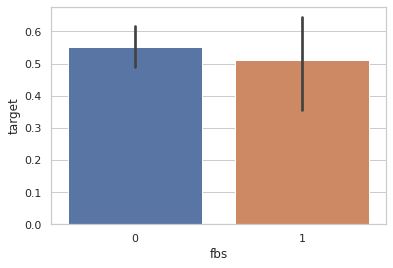

In [72]:
#Analysing the fbs feature(Fasting blood sugar > 120 mg/dl (1 = true; 0 = false))
dataset["fbs"].unique()

sns.barplot(dataset["fbs"],dataset["target"])
plt.show()

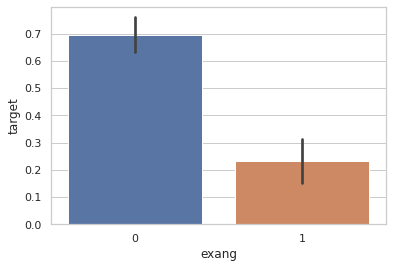

In [73]:
#Analysing the exang feature(Exercise induced angina (1 = yes; 0 = no))
dataset["exang"].unique()

sns.barplot(dataset["exang"],dataset["target"])
plt.show()

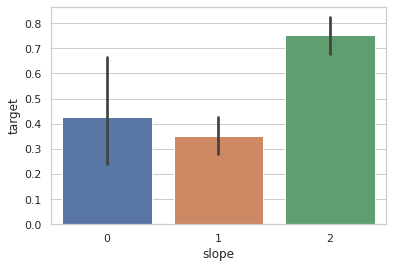

In [74]:
#Analysing the slope feature(Slope of the peak exercise ST segment)
dataset["slope"].unique()

sns.barplot(dataset["slope"],dataset["target"])
plt.show()

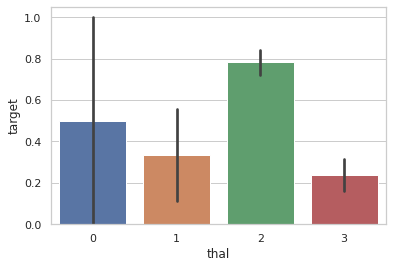

In [75]:
#Analysing the thal feature (thal having three values ,3 = normal; 6 = fixed defect; 7 = reversible defect)
dataset["thal"].unique()

sns.barplot(dataset["thal"],dataset["target"])
plt.show()

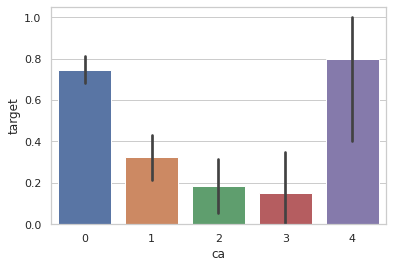

In [76]:
#Analysing the ca feature (Ca=Number of major vessels (0-3) colored by fluoroscopy)
dataset["ca"].unique()

sns.barplot(dataset["ca"],dataset["target"])
plt.show()

### f.	Describe the relationship between cholesterol levels and a target variable

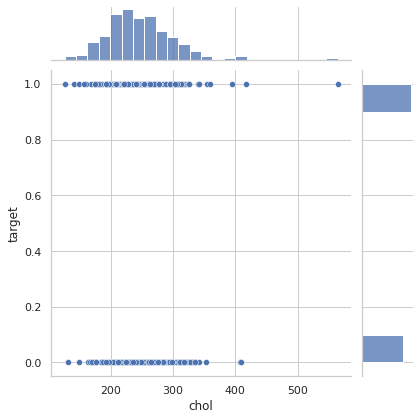

In [77]:
#Analysing the chol feature (Serum cholesterol in mg/dl)
dataset["chol"].unique()

#sns.barplot(dataset["chol"],dataset["target"])
sns.jointplot(data=dataset, x="chol", y="target")

plt.show()

### g.	State what relationship exists between peak exercising and the occurrence of a heart attack

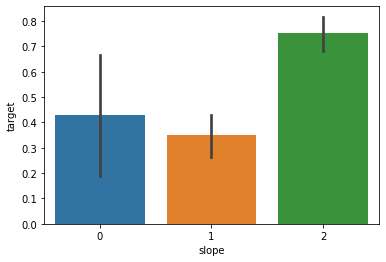

In [28]:
#Analysing the slope feature(Slope of the peak exercise ST segment)
dataset["slope"].unique()

sns.barplot(dataset["slope"],dataset["target"])
#sns.jointplot(data=dataset, x="slope", y="target")
plt.show()

### h.	Check if thalassemia is a major cause of CVD

<AxesSubplot:xlabel='thal', ylabel='target'>

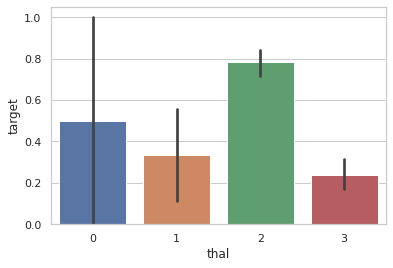

In [79]:
#sns.jointplot(data=dataset, x="thal", y="target")
sns.barplot(dataset["thal"],dataset["target"])

thalassemia is one of the cause of heart attack , in graph we see that thal type 2 having more chance of heart attack

### j.	Use a pair plot to understand the relationship between all the given variables

### Pairplot():-
The pairplot() function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, pairplot() uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:

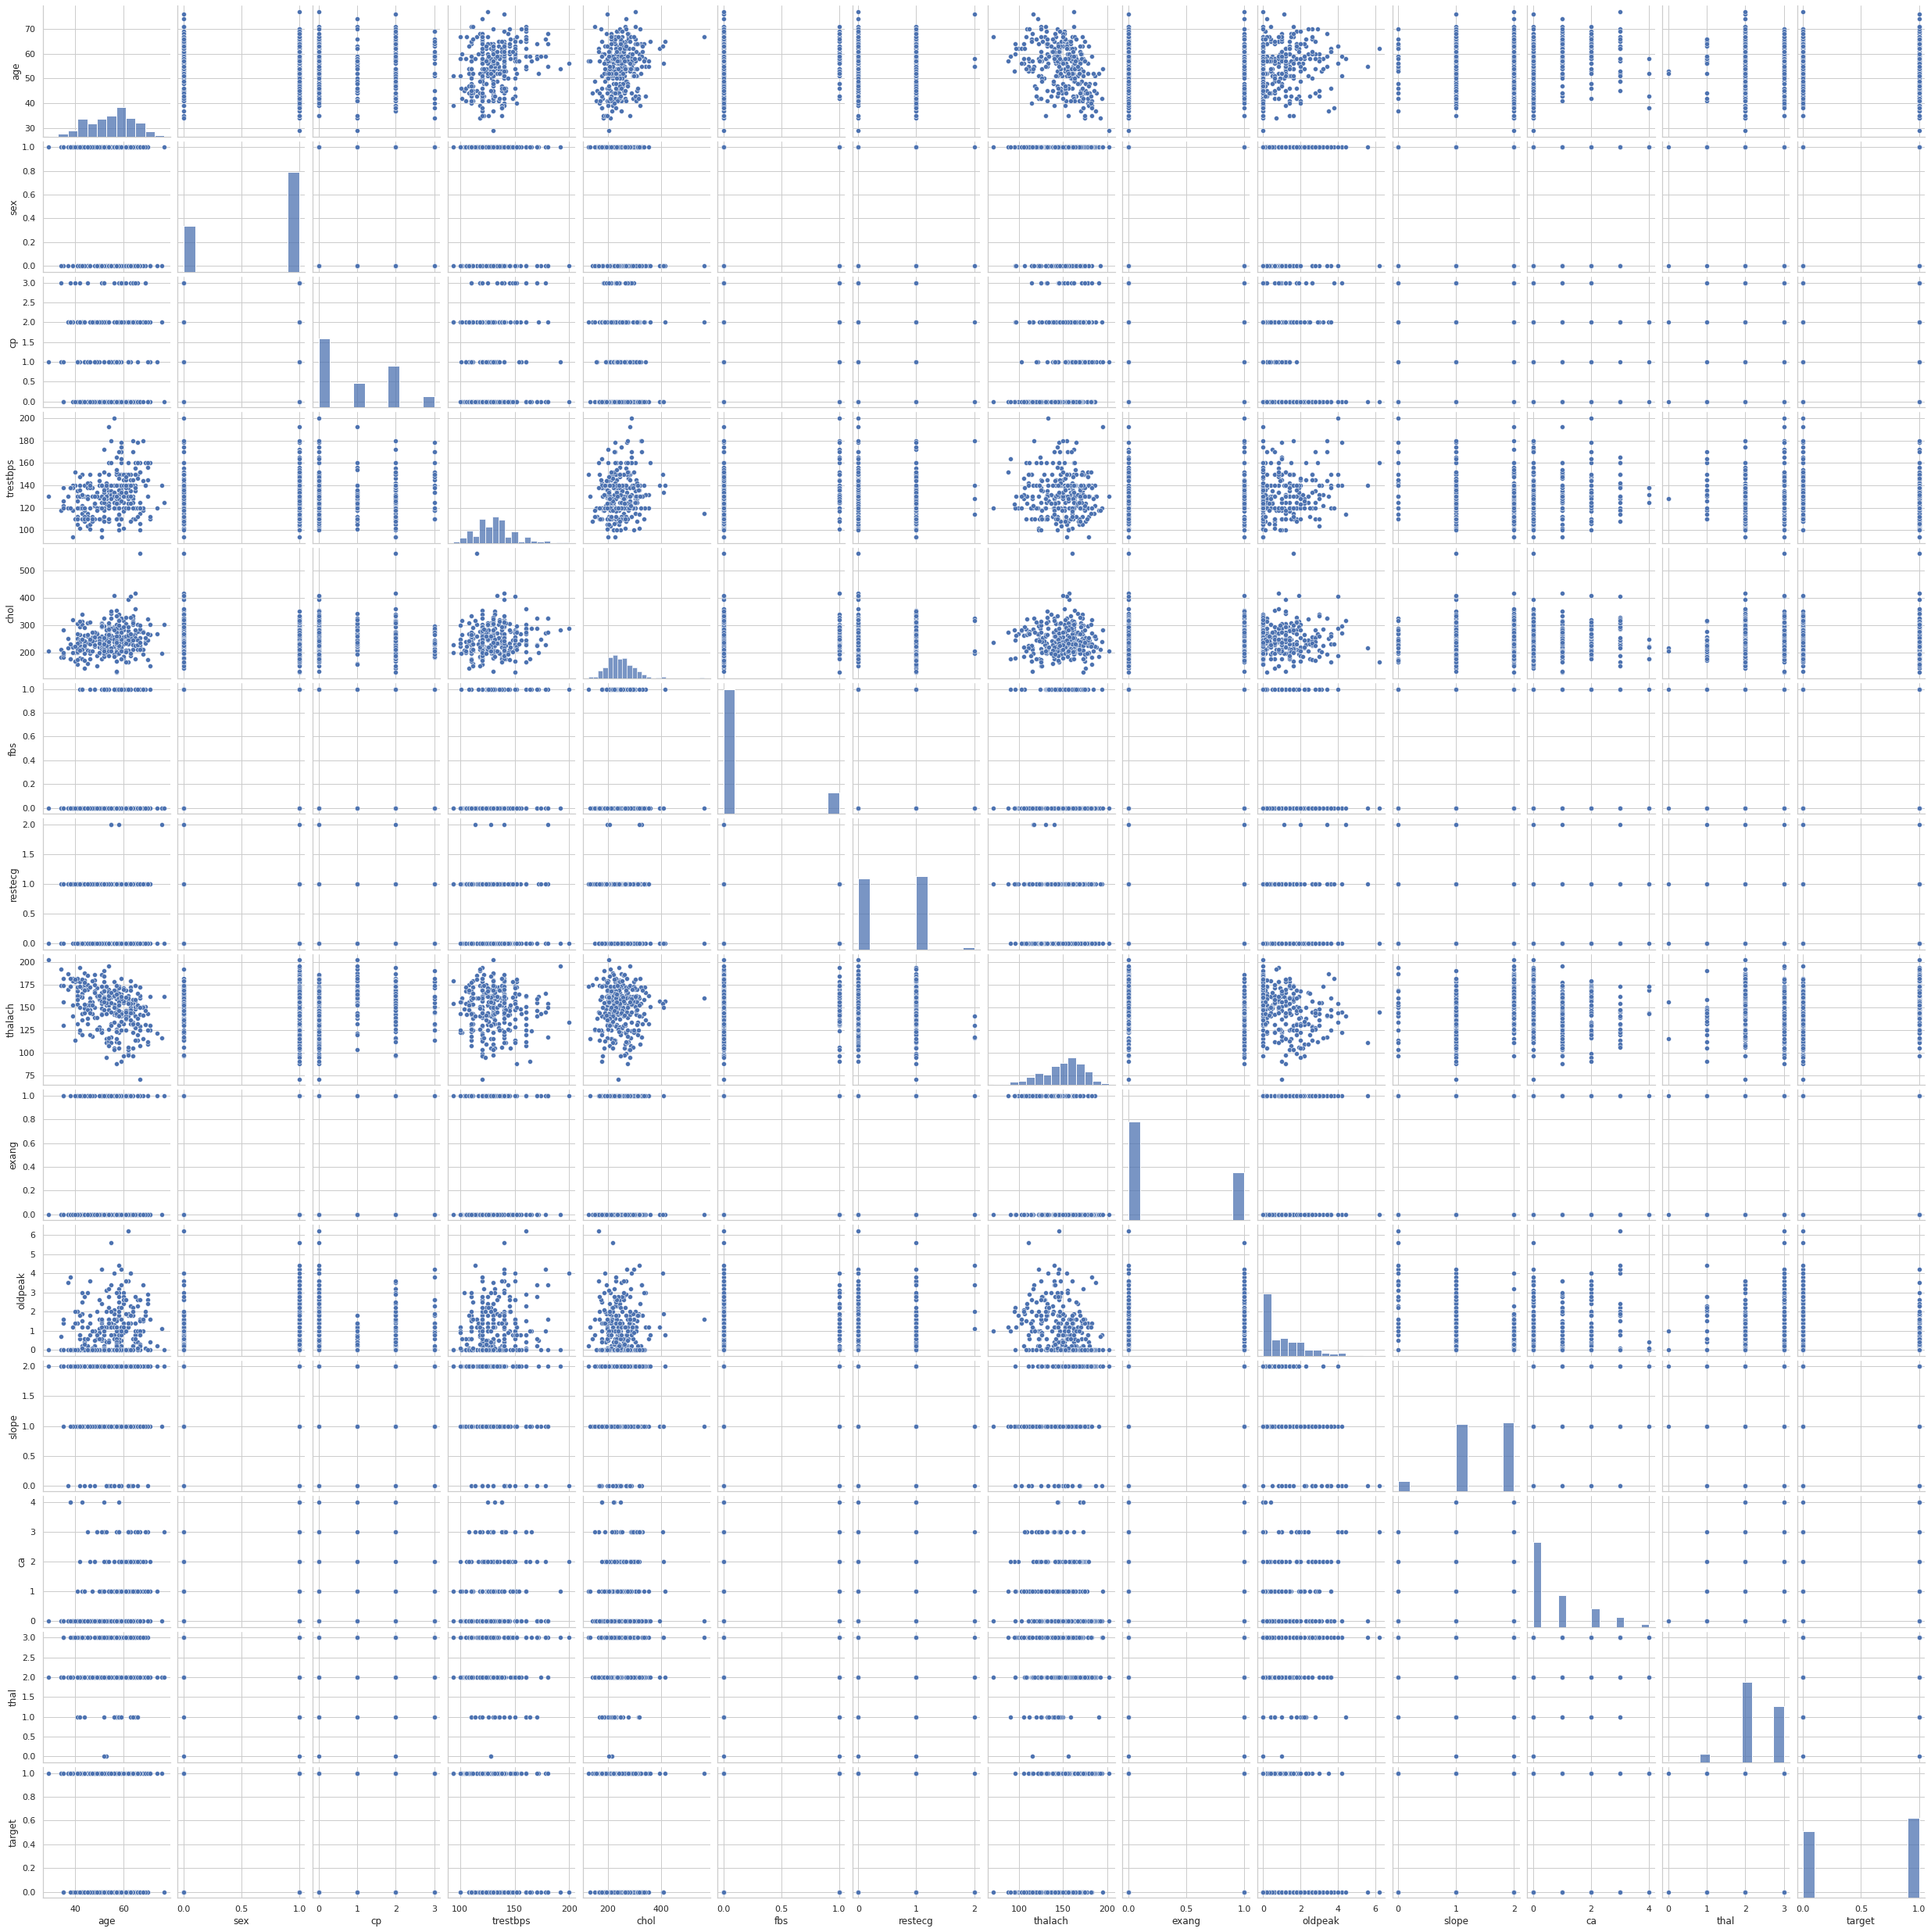

In [85]:
sns.pairplot(dataset)

### Data Processing

### b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

we now use get_dummies method to create dummys for categorical variables.before fitting data to model data should be scaled,or not have any string variables

In [86]:
#segregarting the categorical variables and continuous ones
categorical_val = []
continous_val = []
for column in dataset.columns:
    if len(dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
        
print("The list selected categorical columns for which we create dummies:-",categorical_val)

The list selected categorical columns for which we create dummies:- ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [87]:
categorical_val.remove('target')
dataset = pd.get_dummies(dataset, columns = categorical_val)

In [92]:
dataset.head(2)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [93]:
#standardizing the data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[scaled_columns] = scale.fit_transform(dataset[scaled_columns])

In [94]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [95]:
#Train Test split
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Size of traing dataset{x_train, y_train}:-",X_train.shape,Y_train.shape)
print("Size of testing dataset{x_test, y_test}:-",X_test.shape,Y_test.shape)

#the train and testing data should be same size 

Size of traing dataset{x_train, y_train}:- (242, 30) (242,)
Size of testing dataset{x_test, y_test}:- (61, 30) (61,)


we do the accuracy score comparision of diferent classifications models like 
Logistic Regression
SVM
XGboost
KNN
Randomforest

### 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [96]:
from sklearn.metrics import accuracy_score
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %


In [97]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = 'gini',
                             max_depth = 8,
                             n_estimators=200,
                             min_samples_split=10,
                             random_state=5)
#fitting the training data
clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)
#as we see in confusion matrix we have good classification(22,31) and  very less miss classification(5,3) so our model is pridecting well

array([[22,  5],
       [ 3, 31]])

In [98]:
from sklearn.metrics import accuracy_score

score_rf=round(accuracy_score(Y_test,y_pred)*100,2)
print("The accuracy score achieved using Random forest Classifier is: "+str(score_rf)+" %")

The accuracy score achieved using Random forest Classifier is: 86.89 %


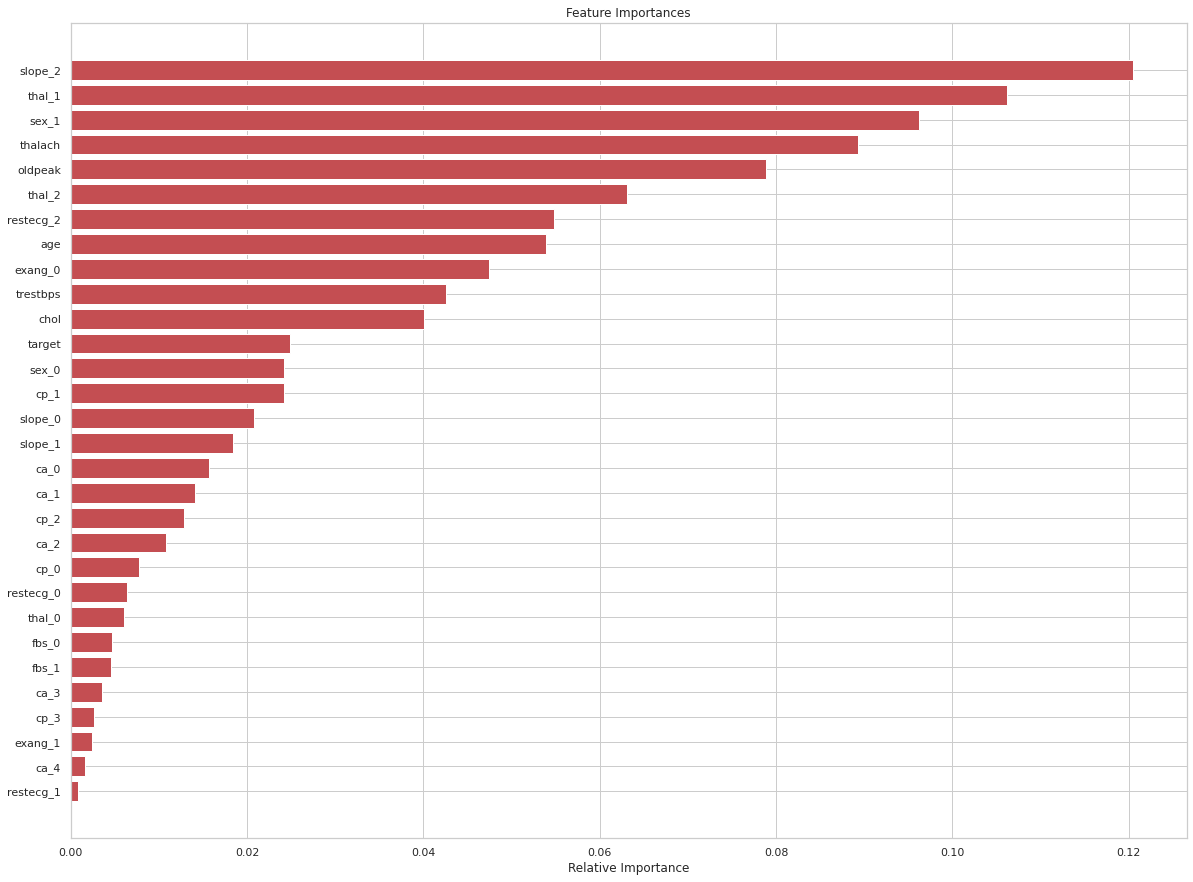

In [99]:
features = dataset.columns
importances = clf.feature_importances_
indices = np.argsort(importances) #the sorting is done in asc order

plt.figure(figsize=(20,15))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [100]:
#SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [101]:
#Xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


In [102]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)

Y_pred_clf = knn_clf.predict(X_test)

score_knn = round(accuracy_score(Y_pred_clf,Y_test)*100,2)
print("The accuracy score achieved using KNN Classifier is: "+str(score_knn)+" %")

The accuracy score achieved using KNN Classifier is: 78.69 %


### Conclusion 
### Our model is predicting very well the give dataset with the use of  diferent classificarion models  

In [106]:
print("*****************************Models and their accuracy***************************************")
print("The accuracy score achieved using Logistic Regression is:- "+str(score_lr)+" %")
print("The accuracy score achieved using Random forest Classifier is:- "+str(score_rf)+" %")
print("The accuracy score achieved using XGBoost is:- "+str(score_xgb)+" %")
print("The accuracy score achieved using Linear SVM is:- "+str(score_svm)+" %")
print("The accuracy score achieved using KNN Classifier is:- "+str(score_knn)+" %")

*****************************Models and their accuracy***************************************
The accuracy score achieved using Logistic Regression is: 88.52 %
The accuracy score achieved using Random forest Classifier is: 86.89 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Linear SVM is: 81.97 %
The accuracy score achieved using KNN Classifier is: 78.69 %


## After implementing five classification models and comparing their accuracy, we can conclude that for this dataset Logistic Regression Classifier is the appropriate model to be used.